# Evaluation Machine Learning Models

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score, \
                            confusion_matrix, classification_report,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [7]:
X_train = pd.read_csv('dataset/X_train_smote.csv.', sep = ';')
y_train = pd.read_csv('dataset/y_train_smote.csv.', sep = ';')
X_test = pd.read_csv('dataset/X_test.csv.', sep = ';')
y_test = pd.read_csv('dataset/y_test.csv.', sep = ';')

In [8]:
print(X_train.shape)
print(y_train.shape)

(38359, 55)
(38359, 1)


In [9]:
print(X_test.shape)
print(y_test.shape)

(6096, 55)
(6096, 1)


## Logistic Regression

In [11]:
log_reg = LogisticRegression(C=0.5, max_iter=75, penalty='l2', solver='liblinear',random_state=42)

In [12]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=75, random_state=42, solver='liblinear')

In [13]:
y_pred_log_reg = log_reg.predict(X_test)

In [14]:
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]  

In [15]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.8996062992125984
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5309
           1       0.62      0.56      0.59       787

    accuracy                           0.90      6096
   macro avg       0.78      0.75      0.77      6096
weighted avg       0.90      0.90      0.90      6096



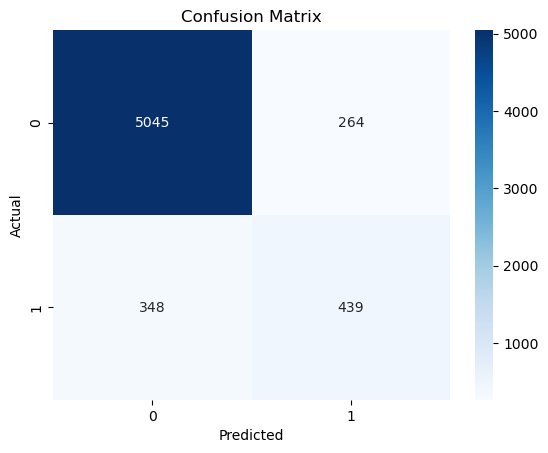

In [16]:
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg_proba)

In [18]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg_proba)

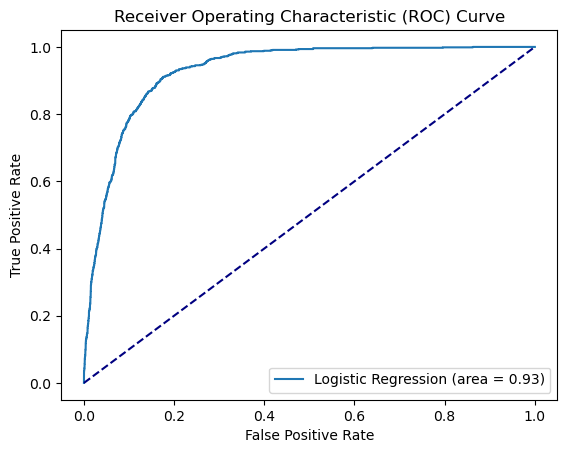

In [19]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## KNN Model

In [20]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=4, weights='distance')

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [22]:
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1] 

In [23]:
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Performance:
Accuracy: 0.8681102362204725
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5309
           1       0.49      0.65      0.56       787

    accuracy                           0.87      6096
   macro avg       0.72      0.78      0.74      6096
weighted avg       0.89      0.87      0.88      6096



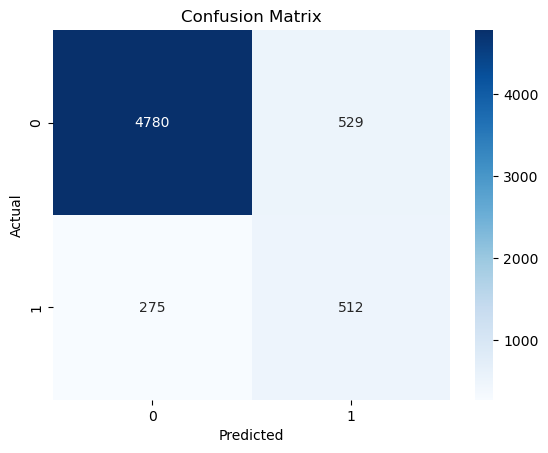

In [24]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_proba)

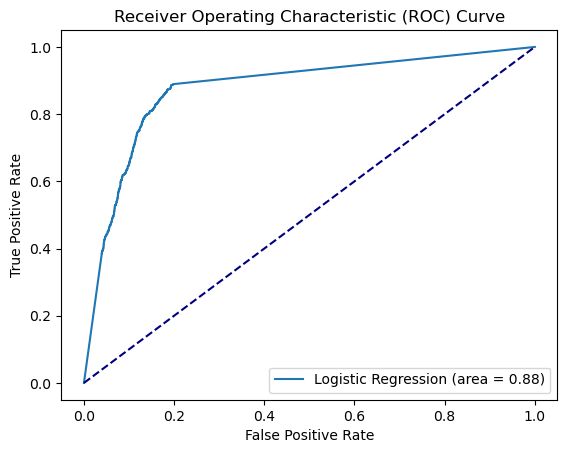

In [26]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## SVM Model

In [27]:
svm_model = SVC(kernel='rbf', C=10, gamma=1, probability=True)

In [28]:
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True)

In [29]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test)
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1] 

In [30]:
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.868766404199475
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5309
           1       0.47      0.15      0.23       787

    accuracy                           0.87      6096
   macro avg       0.68      0.56      0.58      6096
weighted avg       0.83      0.87      0.84      6096



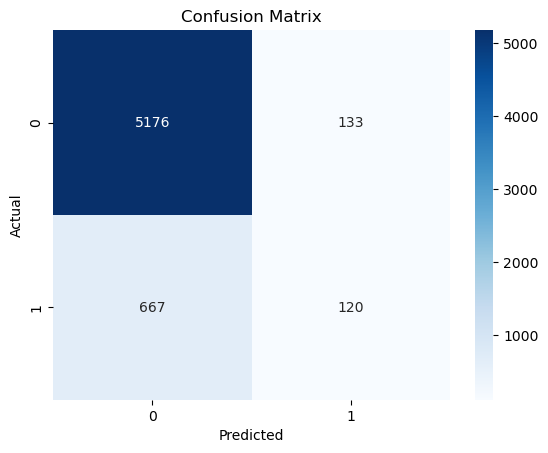

In [31]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba)

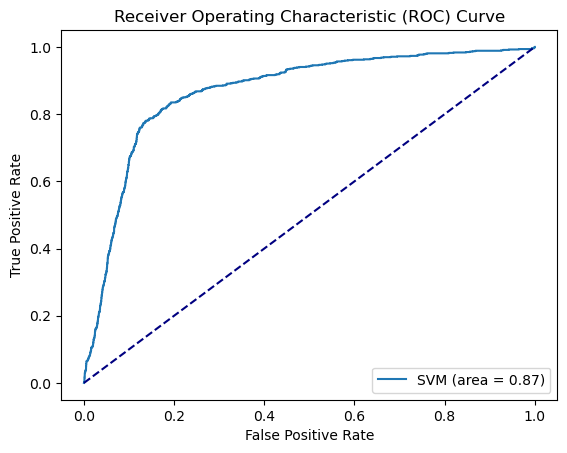

In [33]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Trees Model

In [34]:
DecisionTree_Model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=2,random_state=42)

In [35]:
DecisionTree_Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [37]:
y_pred_dt = DecisionTree_Model.predict(X_test)
y_pred_dt_proba = DecisionTree_Model.predict_proba(X_test)[:, 1] 

In [38]:
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.8763123359580053
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      5309
           1       0.52      0.68      0.59       787

    accuracy                           0.88      6096
   macro avg       0.73      0.79      0.76      6096
weighted avg       0.89      0.88      0.88      6096



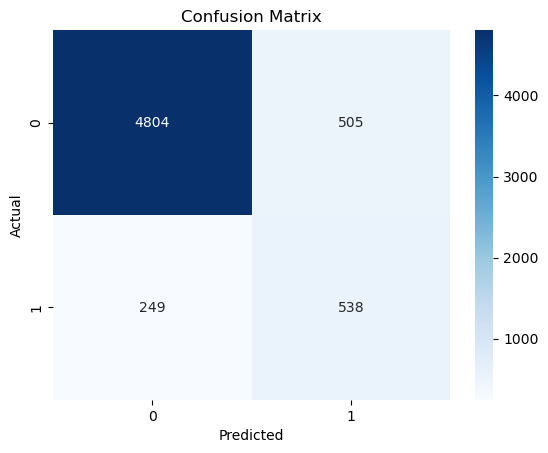

In [39]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)

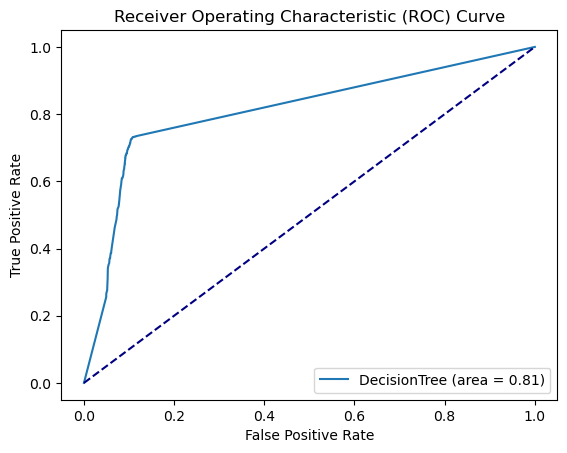

In [41]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='DecisionTree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation 

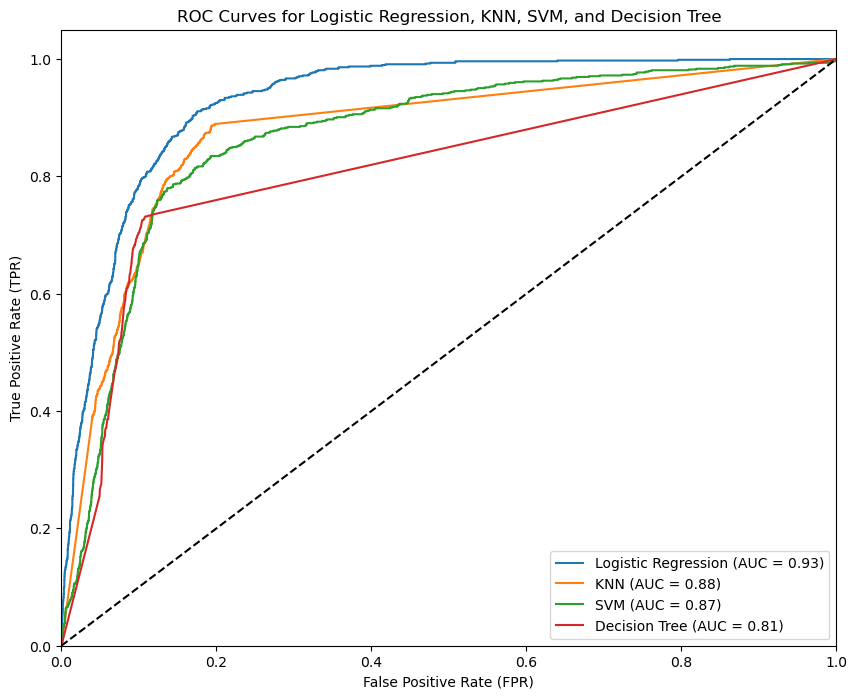

In [43]:
plt.figure(figsize=(10, 8))
# Logistic Regression
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

# K-Nearest Neighbors (KNN)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Support Vector Machine (SVM)
# For SVM, we need to use `decision_function` instead of `predict_proba`
y_prob_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Decision Tree
y_prob_dt = DecisionTree_Model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression, KNN, SVM, and Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [44]:
# Assuming y_test contains the true labels and y_pred_<model> contains the predictions from each model
metrics = {}
# Example for a CNN model:
metrics['LR'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'AUC-ROC': roc_auc_score(y_test, y_pred_log_reg)
}

# Repeat for other models
metrics['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn),
    'AUC-ROC': roc_auc_score(y_test, y_pred_knn)
}

metrics['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'AUC-ROC': roc_auc_score(y_test, y_pred_svm)
}

metrics['DT'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'AUC-ROC': roc_auc_score(y_test, y_pred_dt)
}

In [45]:
# Convert the metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics).T  

# Display the table
print(metrics_df)

     Accuracy  Precision    Recall  F1-Score   AUC-ROC
LR   0.899606   0.624467  0.557814  0.589262  0.754044
KNN  0.868110   0.491835  0.650572  0.560175  0.775465
SVM  0.868766   0.474308  0.152478  0.230769  0.563713
DT   0.876312   0.515820  0.683609  0.587978  0.794244
